Importing the Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Preprocessing

In [5]:
# Loading the dataset csv file to a Pandas DataFrame
gold_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Projects/Gold Price Prediction using ML/gold_price_data.csv')

In [6]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [9]:
#Getting some basic info of dataframe
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# Checking number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [11]:
# Getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1.   Positive
2.   Negative



In [18]:
correlation = gold_data.drop('Date', axis=1).corr()

<Axes: >

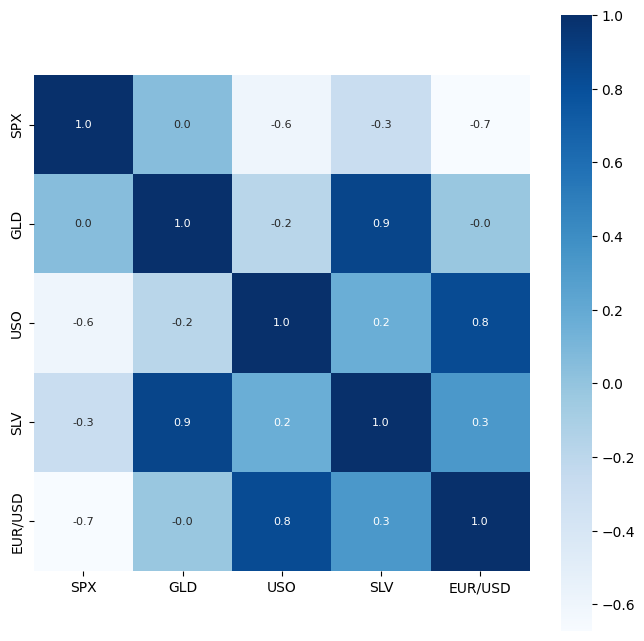

In [15]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [19]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-4292695174.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

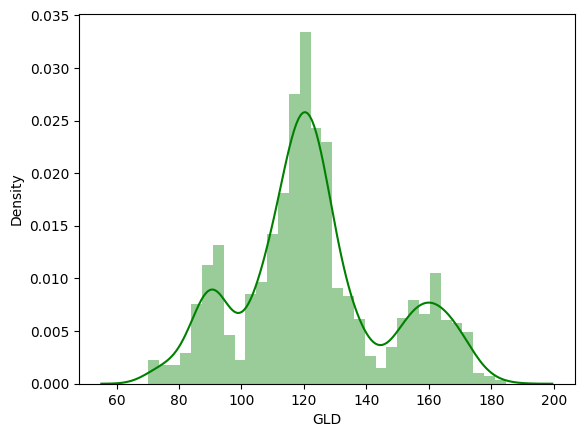

In [23]:
# Checking the distribution for gold price
sns.distplot(gold_data['GLD'], color='green')

Splitting the features and target

In [24]:
x = gold_data.drop(['Date', 'GLD'], axis=1)
y = gold_data['GLD']

In [25]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [26]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

Model: Random Forest Regressor

In [30]:
regressor = RandomForestRegressor(n_estimators=100)

In [31]:
# Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [32]:
# Predicting on test data
test_data_prediction = regressor.predict(X_test)

In [34]:
print(test_data_prediction)

[168.71439917  81.64739993 116.01110047 127.58120106 120.8412009
 154.47219758 150.43419827 126.15610045 117.33349873 126.10040049
 116.53920098 171.19460062 142.1496987  167.82519807 115.13000037
 117.84070032 137.75450397 170.53810138 159.29100347 160.82570001
 155.13939994 125.20469994 175.84029934 157.55780381 125.16360041
  93.80359971  78.00879989 120.20829978 119.10539932 167.4815999
  88.04570024 125.40429987  91.34430105 117.51020041 121.0172996
 136.39900123 115.36330129 114.97560076 147.52980042 107.11620078
 104.7591026   87.21969815 126.46120053 118.09810002 152.47269884
 119.58030016 108.34899977 108.07729843  93.26550062 127.12849797
  74.90080029 113.51739874 121.35819998 111.27199927 118.83689904
 120.6141991  159.33350011 168.46410107 147.06389662  85.91789865
  94.44210011  86.80569876  90.60820017 119.05560084 126.44550059
 127.68179998 171.18120007 122.24269887 117.22459918  98.56430014
 168.37950049 143.03079827 132.44570221 121.12490229 121.09439945
 119.72280076

In [35]:
# R-squared error
error = metrics.r2_score(Y_test, test_data_prediction)
print('R-squared error: ', error)

R-squared error:  0.9892012727309787


Compare the Actual values and Predicted Values in a plot

In [37]:
Y_test = list(Y_test)

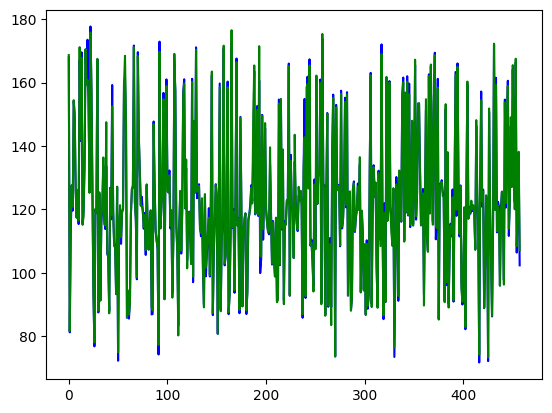

In [38]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
